In [46]:
import pandas as pd
iris = pd.read_csv('./input_data/iris.csv')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [47]:
iris['data_version'] = 1.0
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety,data_version
0,5.1,3.5,1.4,0.2,Setosa,1.0
1,4.9,3.0,1.4,0.2,Setosa,1.0
2,4.7,3.2,1.3,0.2,Setosa,1.0
3,4.6,3.1,1.5,0.2,Setosa,1.0
4,5.0,3.6,1.4,0.2,Setosa,1.0


In [48]:
from sqlalchemy import create_engine

import os
pgconfig = {
    'host': os.environ['DB_HOST'],
    'port': os.environ['DB_PORT'],
    'database': os.environ['DB_NAME'],
    'user': os.environ['DB_USER'],
    'password': os.environ['DB_PASSWORD']
}

engine = create_engine('postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}'.format(**pgconfig))

In [49]:
columns = ['data_version','sepal_length','sepal_width','petal_length','petal_width']

iris[columns].to_sql('iris_input', engine, if_exists='append', index=False)

In [50]:
%load_ext sql
dsl = 'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}'.format(**pgconfig)
%sql $dsl

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: postgres@analysis'

In [51]:
%config SqlMagic.autopandas = True
df_input = %sql select * from iris_input
df_input.head()

 * postgresql+psycopg2://postgres:***@db:5432/analysis
150 rows affected.


,id,data_version,sepal_length,sepal_width,petal_length,petal_width,create_timestamp
0,2,1.0,5.1,3.5,1.4,0.2,2019-11-20 04:05:14.892668
1,3,1.0,4.9,3.0,1.4,0.2,2019-11-20 04:05:14.892668
2,4,1.0,4.7,3.2,1.3,0.2,2019-11-20 04:05:14.892668
3,5,1.0,4.6,3.1,1.5,0.2,2019-11-20 04:05:14.892668
4,6,1.0,5.0,3.6,1.4,0.2,2019-11-20 04:05:14.892668


In [52]:
df_src = df_input[['sepal_length','sepal_width','petal_length','petal_width']]
df_src.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=3, random_state=1)
clusters = kms.fit_predict(df_src)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1)
pca_values = pca.fit_transform(df_src)

In [55]:
df_pca = pd.DataFrame(pca.transform(df_src), columns=['pca1', 'pca2'])
df_pca.head()

,pca1,pca2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [56]:
df_plot = df_pca.assign(cluster_id=clusters)

In [57]:
df_plot.head()

,pca1,pca2,cluster_id
0,-2.684126,0.319397,1
1,-2.714142,-0.177001,1
2,-2.888991,-0.144949,1
3,-2.745343,-0.318299,1
4,-2.728717,0.326755,1


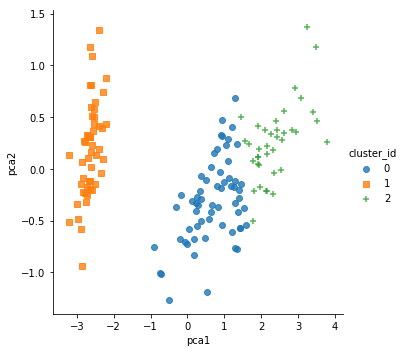

In [58]:
%matplotlib inline
import seaborn as sns

sns.lmplot(x='pca1', y='pca2', data=df_plot, hue='cluster_id', markers=['o', 's', '+'], fit_reg=False)